## Importing Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
pd.set_option("display.max_colwidth",30)
pd.set_option("display.max_columns",50)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

In [214]:
df=pd.read_csv(r"c:\Users\user\Desktop\Kaggle Datasets\sales_data.csv")

# Retail Store Inventory and Demand Forecasting

## Data Info

In [215]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76000 entries, 0 to 75999
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                76000 non-null  object 
 1   Store ID            76000 non-null  object 
 2   Product ID          76000 non-null  object 
 3   Category            76000 non-null  object 
 4   Region              76000 non-null  object 
 5   Inventory Level     76000 non-null  int64  
 6   Units Sold          76000 non-null  int64  
 7   Units Ordered       76000 non-null  int64  
 8   Price               76000 non-null  float64
 9   Discount            76000 non-null  int64  
 10  Weather Condition   76000 non-null  object 
 11  Promotion           76000 non-null  int64  
 12  Competitor Pricing  76000 non-null  float64
 13  Seasonality         76000 non-null  object 
 14  Epidemic            76000 non-null  int64  
 15  Demand              76000 non-null  int64  
dtypes: f

In [216]:
df.shape

(76000, 16)

## Data Handling & Cleaning

In [217]:
df["Date"]=pd.to_datetime(df["Date"])

In [218]:
df.drop(columns=["Store ID","Product ID","Weather Condition","Promotion"],inplace=True)

In [219]:
df.isna().sum()
df.duplicated().sum()

np.int64(0)

## EDA & Visualization

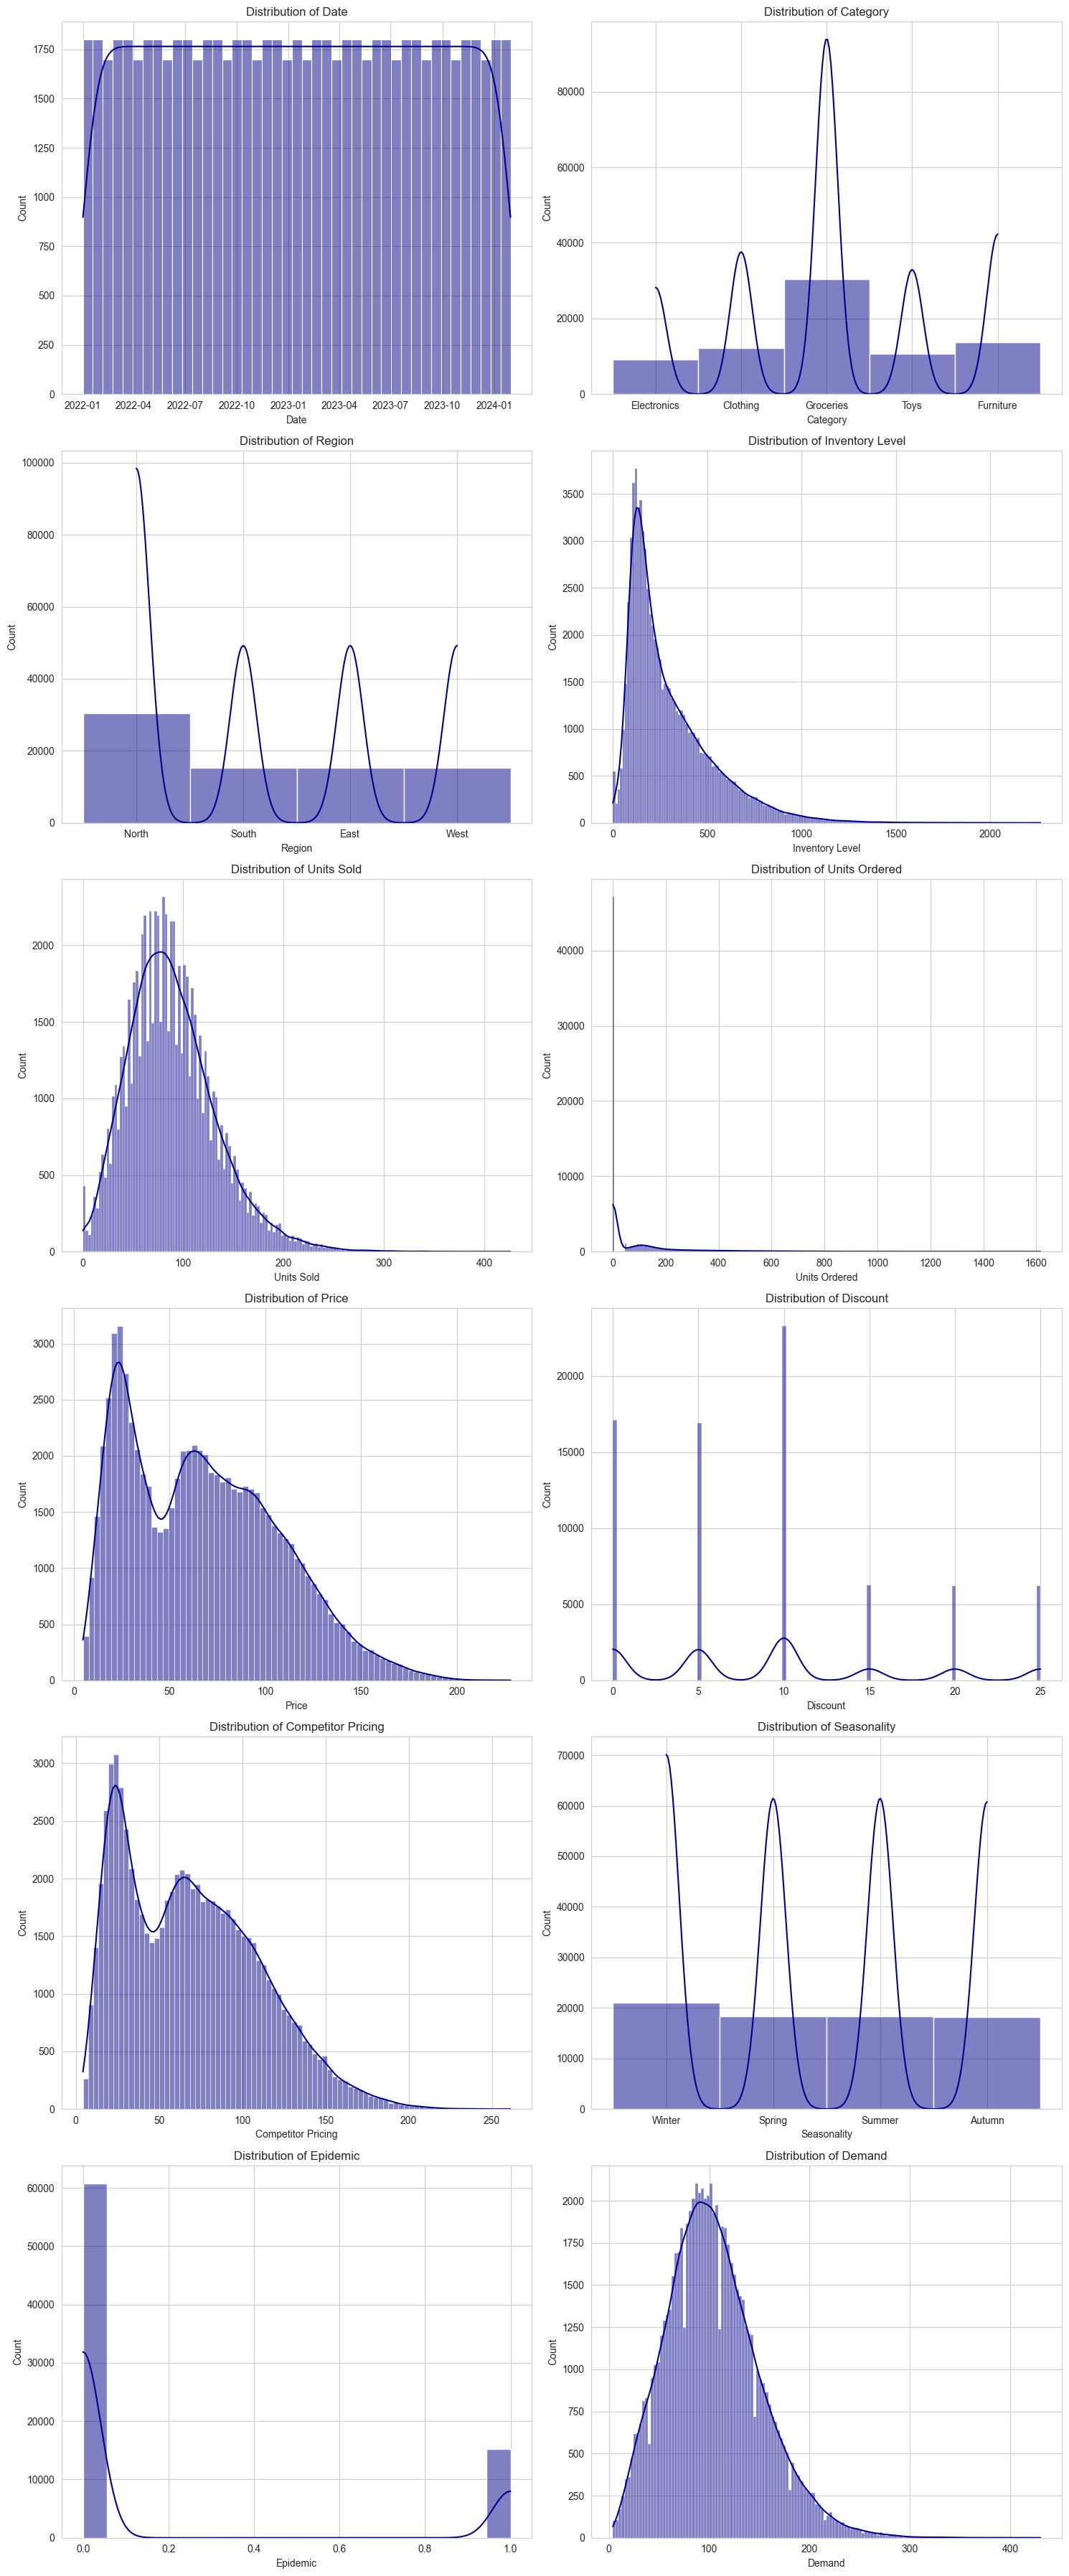

In [220]:
# Define number of columns in the dataset
num_cols = len(df.columns)

# Create subplots (adjust rows and columns as needed)
fig, axes = plt.subplots(nrows=num_cols//2 + num_cols%2, ncols=2, figsize=(15, num_cols * 3))  
axes = axes.flatten()  # Flatten to iterate easily

# Loop through each column and plot
for i, col in enumerate(df.columns):
    sns.histplot(data=df, x=col, kde=True, color="darkblue", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


### `Feature Engineering`

In [221]:
df["Year"]=df["Date"].dt.year
df["Month"]=df["Date"].dt.month
df["Day"]=df["Date"].dt.day
df["Weekday"]=df["Date"].dt.weekday

### `Which Region Is Most Profitable`

In [222]:
classifi_re=df.groupby(["Category","Region"])["Units Sold"].sum().sort_values(ascending=False).reset_index()
classifi_re.style.background_gradient(cmap="Greens")

,Category,Region,Units Sold
0,Groceries,North,1254531
1,Groceries,East,695831
2,Groceries,South,620053
3,Groceries,West,556920
4,Toys,North,469896
5,Clothing,West,354824
6,Furniture,North,344705
7,Clothing,South,343180
8,Furniture,West,339751
9,Clothing,North,309027


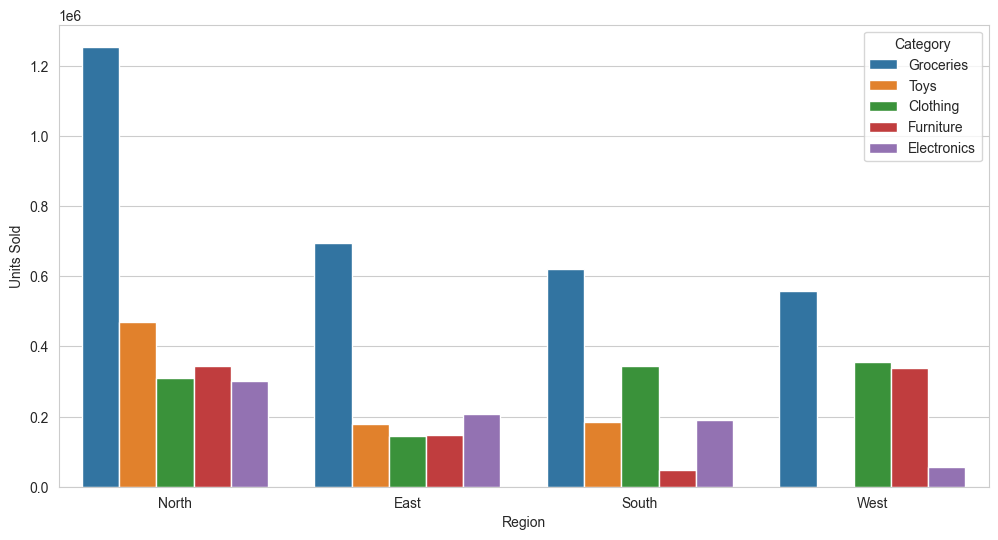

In [223]:
plt.figure(figsize=(12,6))
sns.set_style("whitegrid")
sns.barplot(data=classifi_re,x="Region",y="Units Sold",hue="Category")
plt.show()

### `Date Wise Units Sold`

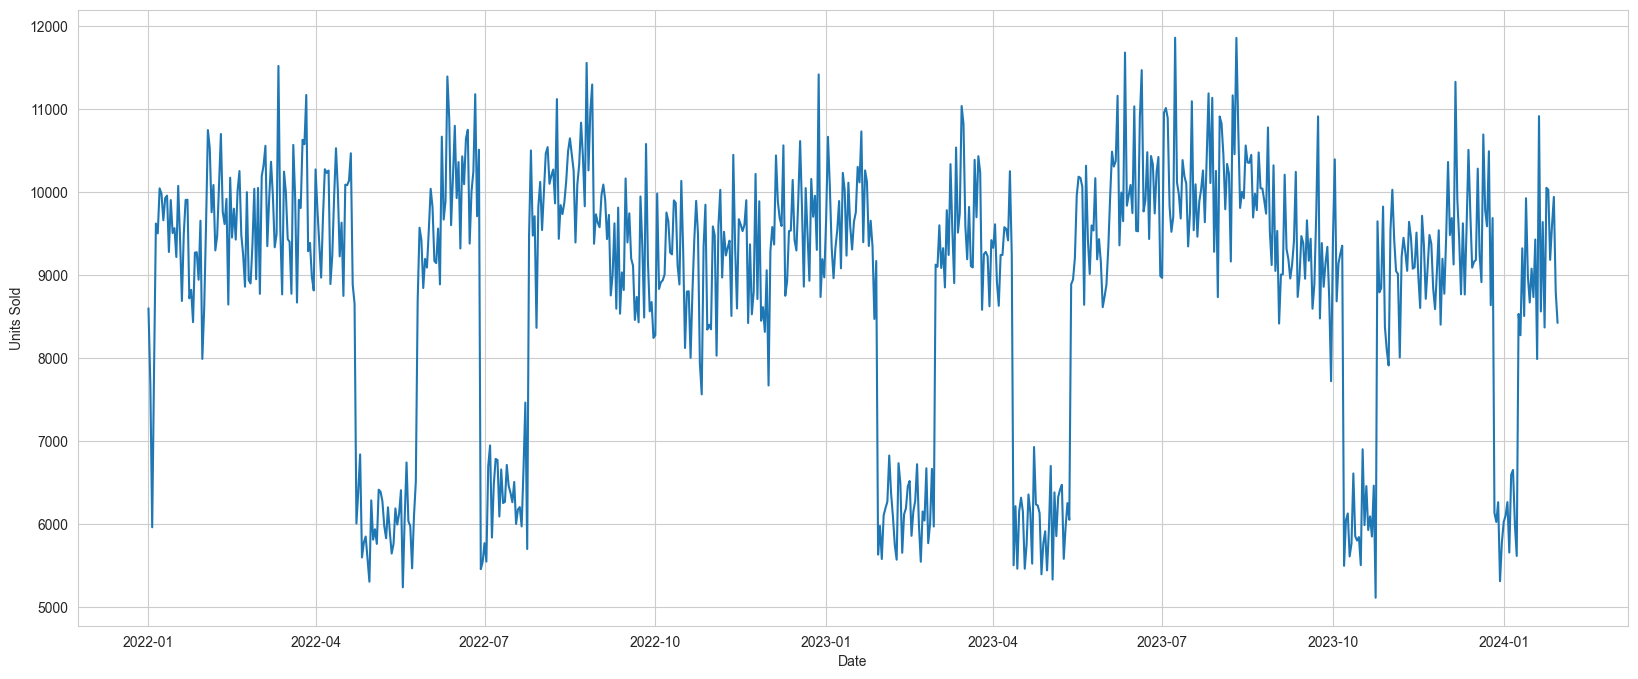

In [224]:
classifi_reg=df.groupby("Date")["Units Sold"].sum().reset_index()
classifi_reg

plt.figure(figsize=(20,8))
sns.lineplot(data=classifi_reg,x="Date",y="Units Sold")
plt.show()

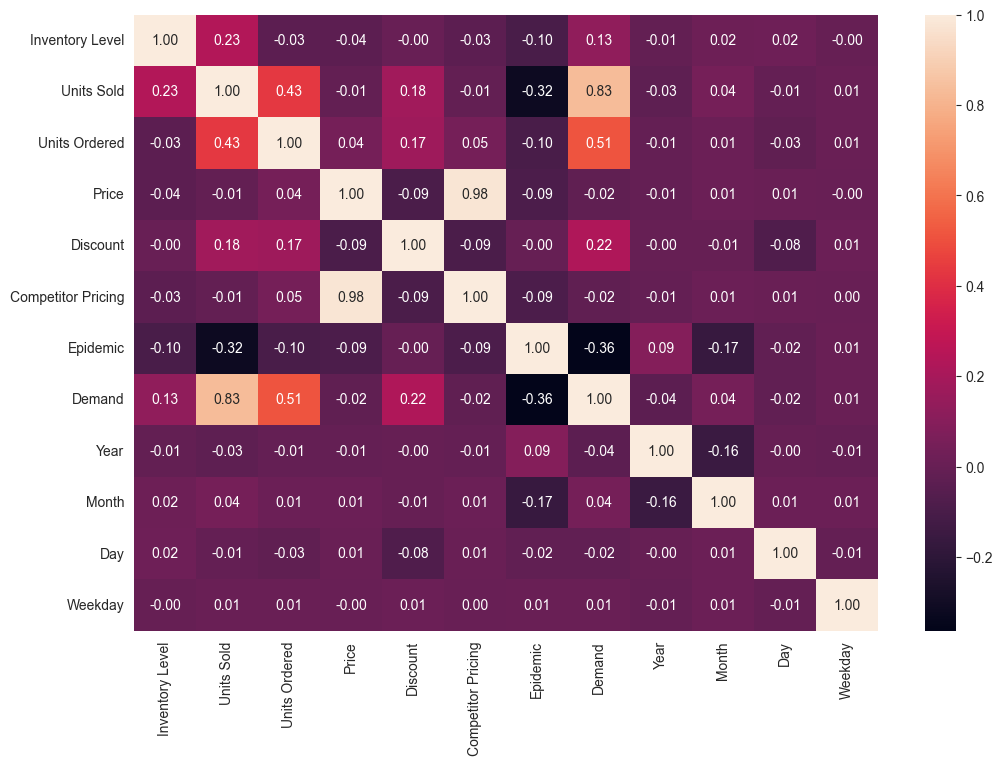

In [225]:
dfc=df.select_dtypes(include="number").corr()
plt.figure(figsize=(12,8))
sns.heatmap(data=dfc,annot=True,fmt=".2f")
plt.show()

### `How Many Units Ordered And Sold By Region`

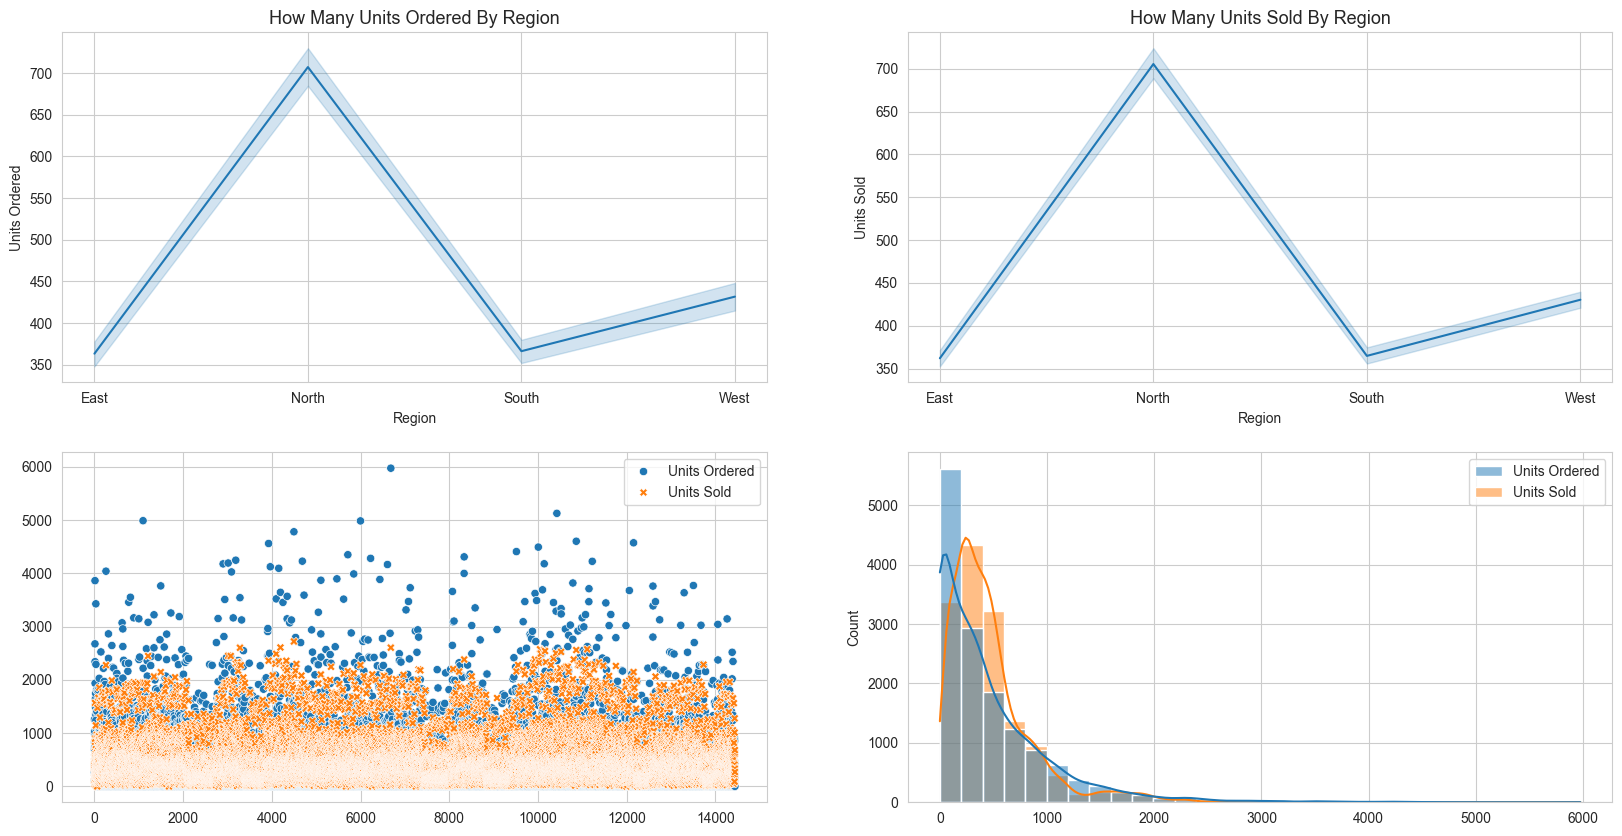

In [226]:
classifi_da=df.groupby(["Date","Category","Region"]).agg({
    "Units Ordered":"sum",
    "Units Sold":"sum"
    }).reset_index()

plt.figure(figsize=(20,10))
plt.subplot(2,2,1)
sns.lineplot(data=classifi_da,x="Region",y="Units Ordered")
plt.title("How Many Units Ordered By Region",fontsize=13)

plt.subplot(2,2,2)
sns.lineplot(data=classifi_da,x="Region",y="Units Sold")
plt.title("How Many Units Sold By Region",fontsize=13)

#Alternate Visualization For Better Understanding
plt.subplot(2,2,3)
sns.scatterplot(data=classifi_da)

plt.subplot(2,2,4)
sns.histplot(data=classifi_da,kde=True,bins=30)
plt.show()

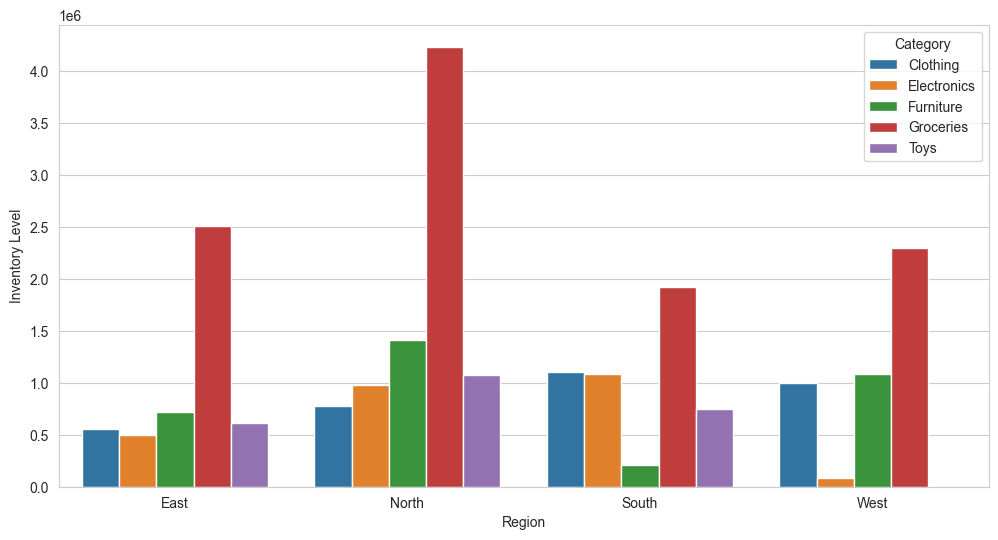

In [227]:
classifi_iv=df.groupby(["Category","Region"])["Inventory Level"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_iv,x="Region",y="Inventory Level",hue="Category")
plt.show()

### `Which Category Is In More Demand By Region`

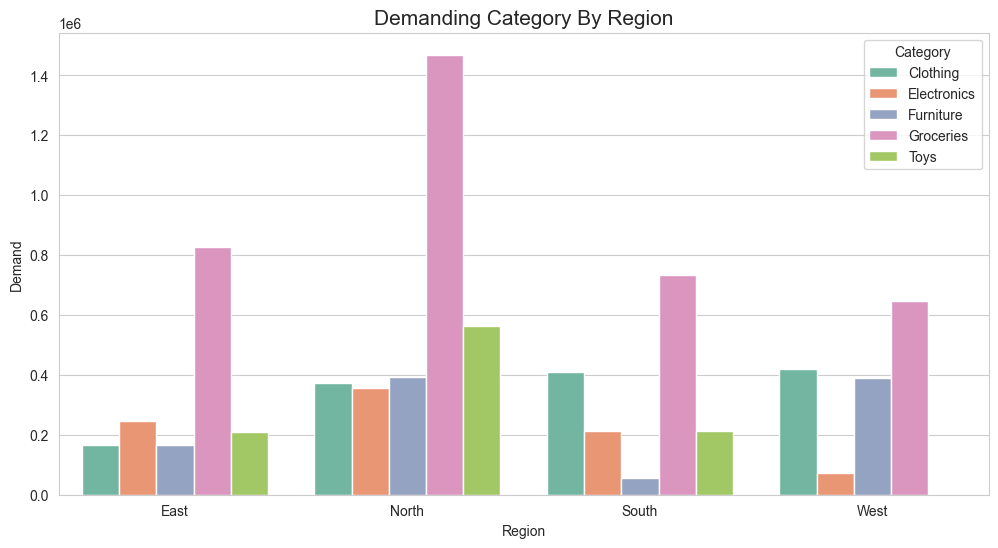

In [228]:
classifi_dem=df.groupby(["Category","Region"])["Demand"].sum().reset_index()
plt.figure(figsize=(12,6))
sns.barplot(data=classifi_dem,x="Region",y="Demand",hue="Category",palette="Set2")
plt.title("Demanding Category By Region",fontsize=15)
plt.show()

### `Competitor Price VS Actual Price`

In [229]:
classifi_pr=df.groupby(["Category","Region"]).agg({
    "Price":"mean",
    "Competitor Pricing":"mean"
}).reset_index()
classifi_pr.style.background_gradient(cmap="Oranges")

,Category,Region,Price,Competitor Pricing
0,Clothing,East,92.474507,94.715007
1,Clothing,North,58.890602,60.442385
2,Clothing,South,65.623537,67.314908
3,Clothing,West,79.136482,81.351116
4,Electronics,East,101.389184,103.606342
5,Electronics,North,64.235892,65.892363
6,Electronics,South,88.323114,90.486825
7,Electronics,West,107.748868,110.632342
8,Furniture,East,109.849662,112.790522
9,Furniture,North,127.085682,130.054739


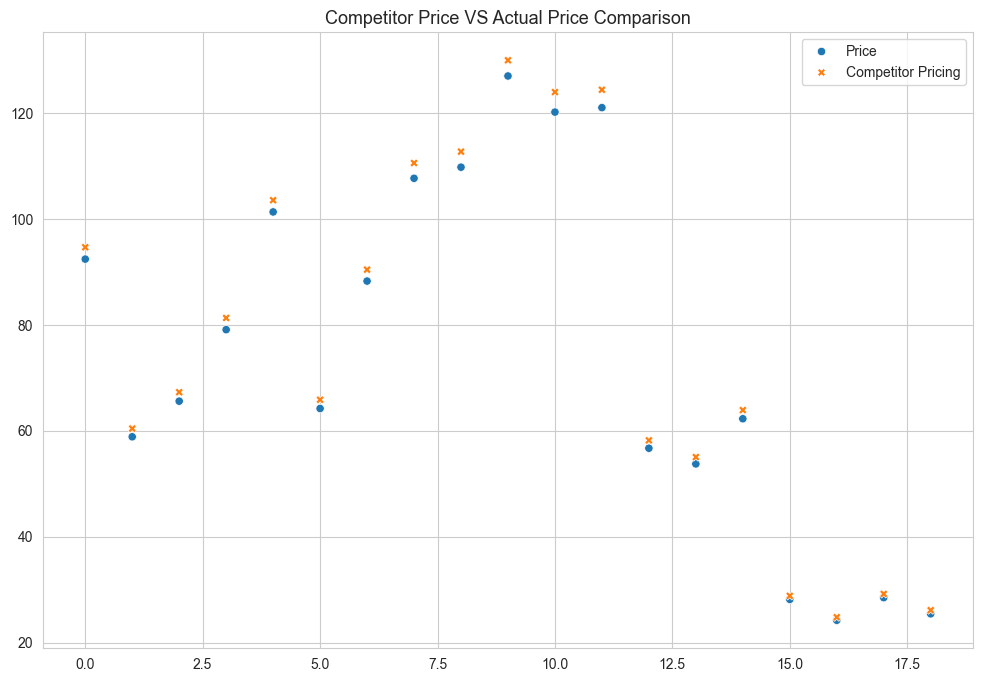

In [230]:
classifi_pr=df.groupby(["Category","Region"]).agg({
    "Price":"mean",
    "Competitor Pricing":"mean"
}).reset_index()
plt.figure(figsize=(12,8))
sns.scatterplot(data=classifi_pr)
plt.title("Competitor Price VS Actual Price Comparison",fontsize=13)
plt.show()

### `AVG Discounted Category In Different Region & Over The Time`

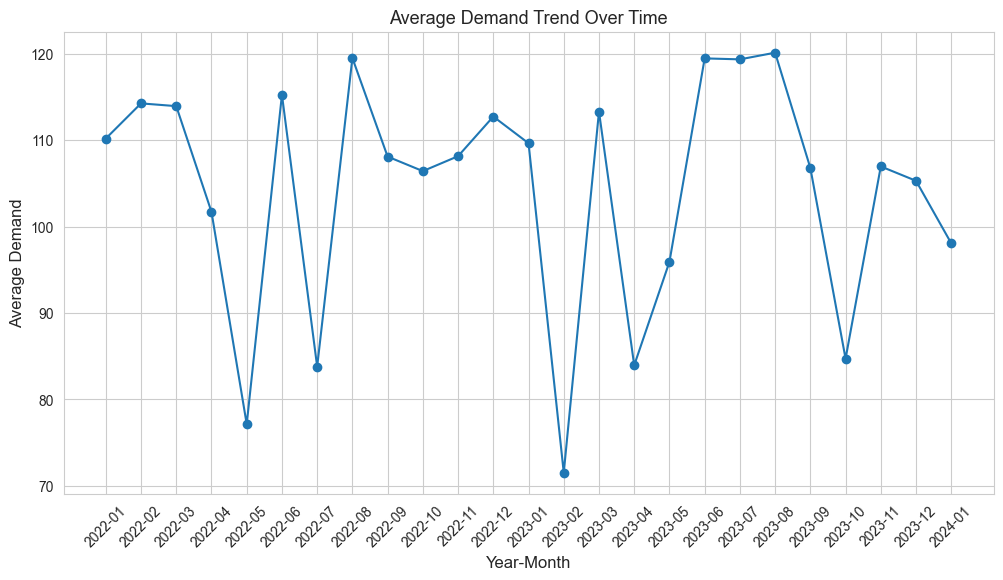

In [231]:
df['YearMonth'] = df['Date'].dt.to_period('M')
demand_trend = df.groupby('YearMonth')['Demand'].mean().reset_index()
plt.figure(figsize=(12, 6))
plt.plot(demand_trend['YearMonth'].astype(str), demand_trend['Demand'], marker='o')
plt.title('Average Demand Trend Over Time', fontsize=13)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Average Demand', fontsize=12)
plt.xticks(rotation=45)
plt.savefig('demand_trend.png')

In [232]:
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Competitor Pricing,Seasonality,Epidemic,Demand,Year,Month,Day,Weekday,YearMonth
0,2022-01-01,Electronics,North,195,102,252,72.72,5,85.73,Winter,0,115,2022,1,1,5,2022-01
1,2022-01-01,Clothing,North,117,117,249,80.16,15,92.02,Winter,0,229,2022,1,1,5,2022-01
2,2022-01-01,Clothing,North,247,114,612,62.94,10,60.08,Winter,0,157,2022,1,1,5,2022-01
3,2022-01-01,Electronics,North,139,45,102,87.63,10,85.19,Winter,0,52,2022,1,1,5,2022-01
4,2022-01-01,Groceries,North,152,65,271,54.41,0,51.63,Winter,0,59,2022,1,1,5,2022-01


In [233]:
df[["Category","Region","Seasonality"]].value_counts().reset_index()


,Category,Region,Seasonality,count
0,Groceries,North,Winter,3360
1,Groceries,North,Spring,2944
2,Groceries,North,Summer,2944
3,Groceries,North,Autumn,2912
4,Groceries,East,Winter,1890
...,...,...,...,...
71,Electronics,West,Spring,184
72,Furniture,South,Spring,184
73,Furniture,South,Summer,184
74,Furniture,South,Autumn,182


## Machine Learning

In [234]:
le_category = LabelEncoder()
le_region = LabelEncoder()
le_seasonality = LabelEncoder()

df['Category_Encoded'] = le_category.fit_transform(df['Category'])
df['Region_Encoded'] = le_region.fit_transform(df['Region'])
df['Seasonality_Encoded'] = le_seasonality.fit_transform(df['Seasonality'])
# Category=
# Clothing=0,Electronics=1,Furniture=2,Groceries=3,Toys=4

#Region=East=0,North=1,South=2,West=3

#Seasonality=Autumn=0,Spring=1,Summer=2,Winter=3

In [235]:
df["Price_Discounted"] = df["Price"] - df["Discount"]
df['Price_Competitor_Diff'] = df['Price'] - df['Competitor Pricing']

In [236]:
df["Discount_Percentage"] = df["Discount"] / 100


In [237]:
df.head()

,Date,Category,Region,Inventory Level,Units Sold,Units Ordered,Price,Discount,Competitor Pricing,Seasonality,Epidemic,Demand,Year,Month,Day,Weekday,YearMonth,Category_Encoded,Region_Encoded,Seasonality_Encoded,Price_Discounted,Price_Competitor_Diff,Discount_Percentage
0,2022-01-01,Electronics,North,195,102,252,72.72,5,85.73,Winter,0,115,2022,1,1,5,2022-01,1,1,3,67.72,-13.01,0.05
1,2022-01-01,Clothing,North,117,117,249,80.16,15,92.02,Winter,0,229,2022,1,1,5,2022-01,0,1,3,65.16,-11.86,0.15
2,2022-01-01,Clothing,North,247,114,612,62.94,10,60.08,Winter,0,157,2022,1,1,5,2022-01,0,1,3,52.94,2.86,0.10
3,2022-01-01,Electronics,North,139,45,102,87.63,10,85.19,Winter,0,52,2022,1,1,5,2022-01,1,1,3,77.63,2.44,0.10
4,2022-01-01,Groceries,North,152,65,271,54.41,0,51.63,Winter,0,59,2022,1,1,5,2022-01,3,1,3,54.41,2.78,0.00


Mean Squared Error: 308.92
R² Score: 0.86


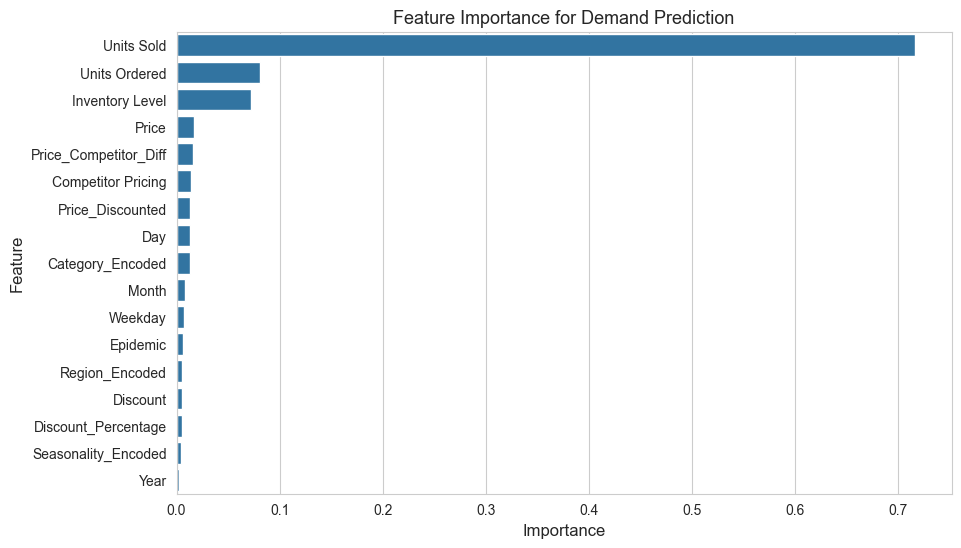

In [238]:
df_model = df.drop(columns=['Date', 'Category', 'Region', 'Seasonality', 'YearMonth'])

# Model Training and Evaluation
X = df_model.drop(columns=['Demand'])
y = df_model['Demand']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R² Score: {r2:.2f}')

# Feature Importance Plot
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importance for Demand Prediction', fontsize=13)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.savefig('feature_importance.png')